#**IMPORTING LIBRARIES AND EXTRACTING DATA**

**Importing libraries**

In [63]:
import pandas as pd
# Load a library to do the hard work for us
import statsmodels.formula.api as smf
# This will be used for graphing the data and the model
import graphing 
import matplotlib.pyplot as plt
import numpy as np

#Used for saving and loading an already trained model 
import joblib

**Extracting data**

In [ ]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv

#**CREATING THE FIRST MODEL**

**DEFINING THE DATA**

In [ ]:
dataset = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40, 
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41, 
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37, 
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}

df = pd.DataFrame(dataset)
df

**SELECTING AND CREATING THE MODEL**

We are going to use a simple model called OLS (Ordinary Least Squares). So basically what we're doing with this model is finding the best line that represents our dataset. This can be accomplished by changing the values of m and b. The error must be minimized.


In [8]:
# First, we define our formula using a special syntax
# This says that boot_size is explained by harness_size
formula = "boot_size ~ harness_size"

# Create the model, but don't train it yet
model = smf.ols(formula = formula, data = dataset)

# Note that we have created our model but it does not 
# have internal parameters set yet
print("Model selected but it does not have parameters set. We need to train it!") if not hasattr(model, 'params') else print("")
    

Model selected but it does not have parameters set. We need to train it!


**TRAINING THE MODEL** 

In [12]:
# Train (fit) the model so that it creates a line that fits our data.
fitted_model = model.fit()

# Print information about our model now it has been fit
print("The following model parameters have been found:\n" +
        f"Line slope: {fitted_model.params[1]}\n"+
        f"Line Intercept: {fitted_model.params[0]}")

The following model parameters have been found:
Line slope: 0.585925416738271
Line Intercept: 5.71910981268259


Now we're going to graph our model and the dataset

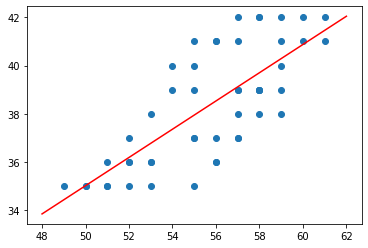

In [42]:
plt.scatter(dataset["harness_size"],dataset["boot_size"])
new_x = np.linspace(dataset["harness_size"].min()-1,dataset["harness_size"].max()+1,50)
trendline = fitted_model.params[1]*new_x+fitted_model.params[0]
plt.plot(new_x,trendline,color="red")
plt.show()

**USING THE MODEL**

In [44]:
# harness_size states the size of the harness we are interested in
harness_size = { 'harness_size' : [52.5] }

# Use the model to predict what size of boots the dog will fit
approximate_boot_size = fitted_model.predict(harness_size)

# Print the result
print(f"The estimated boot size, given that the harness size is {harness_size['harness_size'][0]}, should be: {round(approximate_boot_size[0],2)}")

The estimated boot size, given that the harness size is 52.5, should be: 36.48


#**EXPLORING A LITTLE DEEPER THE DATA**

In [52]:
dataset = pd.read_csv('doggy-boot-harness.csv')
print(f"The data set has {dataset['boot_size'].count()} rows")
#Another way to print the number of rows:

#print(f"We have {len(dataset)} rows of data")

dataset.head()

The data set has 50 rows


,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


In [50]:
# Remove the sex and age-in-years columns.
new_dataset = dataset.drop(["sex","age_years"], axis=1)

# Print the column names
print("\nAvailable columns after deleting sex and age information:")
new_dataset.head()


Available columns after deleting sex and age information:


,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57


In [53]:
# Determine whether each avalanche dog's harness size is < 55
is_small = new_dataset.harness_size < 55
new_dataset["Harness smaller than 55?"] = is_small

# Print the number of small dogs
print(f"\nNumber of dogs with harness size less than 55: {len(new_dataset['Harness smaller than 55?']==True)}")


Number of dogs with harness size less than 55: 50


In [54]:
# Make a copy of the dataset that only contains dogs with a boot size below size 40

data_smaller_paws = new_dataset.drop("Harness smaller than 55?",axis=1)[dataset.boot_size < 40].copy()

# Print information about this
print(f"We now have {len(data_smaller_paws)} rows in our dataset. The last few rows are:")
data_smaller_paws.tail()

We now have 34 rows in our dataset. The last few rows are:


,boot_size,harness_size
42,36,52
46,39,58
47,39,57
48,35,51
49,39,59


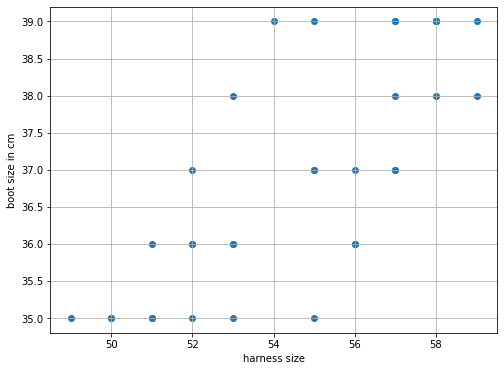

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(data_smaller_paws['harness_size'],data_smaller_paws['boot_size'])
plt.xlabel("harness size")
plt.ylabel("boot size in cm")
plt.grid(True)
plt.show()

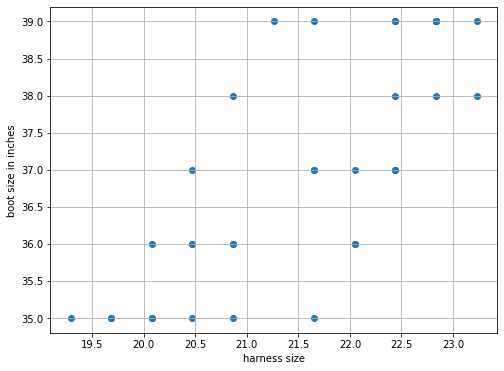

In [61]:
# Convert harness sizes from metric to imperial units and save the result to a new column
data_smaller_paws['harness_size_imperial'] = data_smaller_paws.harness_size / 2.54

# Show a graph of harness size in imperial units
plt.figure(figsize=(8,6))
plt.scatter(data_smaller_paws['harness_size_imperial'],data_smaller_paws['boot_size'])
plt.xlabel("harness size")
plt.ylabel("boot size in inches")
plt.grid(True)
plt.show()

#**USING THE MODEL ON NEW DATA**

In [62]:
# Load a file containing dog's boot and harness sizes
data = pd.read_csv('doggy-boot-harness.csv')

# Print the first few rows
data.head()

,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


In [64]:
# creating again the model but this time we're using the data extracted from the csv file
model = smf.ols(formula = "boot_size ~ harness_size", data = data).fit()

In [66]:
#Here we just say the name of the file in which the model will be stored
model_filename = './avalanche_dog_boot_model.pkl'
#saving our model
joblib.dump(model, model_filename)

#loading our model
model_loaded = joblib.load(model_filename)
print("We have loaded a model with the following parameters:")
print(model_loaded.params)

We have loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


In [78]:
# Here's a function that loads and uses the model
def load_model_and_predict(harness_size):
    '''
    This function loads a pretrained model. It uses the model
    with the customer's dog's harness size to predict the size of
    boots that will fit that dog.

    harness_size: The dog harness size, in cm 
    '''

    # Load the model from file and print basic information about it
    loaded_model = joblib.load(model_filename)

    print(f"We've loaded a model with the following parameters:\nSlope={loaded_model.params[1]}\nIntercept={loaded_model.params[0]}")

    # Prepare data for the model
    inputs = {"harness_size":[harness_size]} 

    # Use the model to make a prediction
    predicted_boot_size = loaded_model.predict(inputs)[0] #we're accessing to the first value of the list, since the loaded model returns a list with the prediction

    return round(predicted_boot_size)

# Practice using our model
predicted_boot_size = load_model_and_predict(45)

print("\nPredicted dog boot size:", predicted_boot_size)

We've loaded a model with the following parameters:
Slope=0.585925416738271
Intercept=5.71910981268259

Predicted dog boot size: 32


**Real world use**

We've done it; we can predict an avalanche dog's boot size based on the size of their harness. Our last step is to use this to warn people if they might be buying the wrong sized doggy boots.

As an example, we'll make a function that accepts the harness size, the size of the boots selected, and returns a message for the customer. We would integrate this function into our online store.

In [82]:
def check_size_of_boots(selected_harness_size, selected_boot_size):
    '''
    Calculates whether the customer has chosen a pair of doggy boots that 
    are a sensible size. This works by estimating the dog's actual boot 
    size from their harness size.

    This returns a message for the customer that should be shown before
    they complete their payment 

    selected_harness_size: The size of the harness the customer wants to buy
    selected_boot_size: The size of the doggy boots the customer wants to buy
    '''

    # Estimate the customer's dog's boot size
    estimated_boot_size = load_model_and_predict(selected_harness_size)

    # Round to the nearest whole number because we don't sell partial sizes
    estimated_boot_size = int(round(estimated_boot_size))

    # Check if the boot size selected is appropriate
    if selected_boot_size == estimated_boot_size:
        # The selected boots are probably OK
        return f"Great choice! We think these boots will fit your avalanche dog well."

    if selected_boot_size < estimated_boot_size:
        # Selected boots might be too small 
        return "The boots you have selected might be TOO SMALL for a dog as "\
               f"big as yours. We recommend a doggy boots size of {estimated_boot_size}."

    if selected_boot_size > estimated_boot_size:
        # Selected boots might be too big 
        return "The boots you have selected might be TOO BIG for a dog as "\
               f"small as yours. We recommend a doggy boots size of {estimated_boot_size}."
    

# Practice using our new warning system
check_size_of_boots(selected_harness_size=55, selected_boot_size=39)

We've loaded a model with the following parameters:
Slope=0.585925416738271
Intercept=5.71910981268259


'The boots you have selected might be TOO BIG for a dog as small as yours. We recommend a doggy boots size of 38.'